We are creating an original dataset of size 30 with 6 dimensions





**Datasets**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KDTree, NearestNeighbors
import matplotlib.pyplot as plt
import time
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

# Create the original dataset
original_dataset = np.random.rand(30, 6)

# Create an array to store datasets of varying sizes
array_of_datasets_size = []

# Generate datasets of sizes ranging from 5 to 30
for size in range(5, 31):
    dataset = original_dataset[:size]  # Slice the original dataset
    array_of_datasets_size.append(dataset)

# Print the array of datasets
for idx, dataset in enumerate(array_of_datasets_size):
    print(f"Dataset {idx+1} (size: {len(dataset)}):\n{dataset}\n")



Dataset 1 (size: 5):
[[0.45805495 0.30834961 0.23148705 0.27742455 0.81723481 0.11134664]
 [0.62643723 0.27678789 0.68217467 0.67897078 0.79671742 0.04580216]
 [0.91259827 0.21381599 0.3036373  0.98906362 0.1858815  0.98872484]
 [0.75008423 0.22238605 0.14790391 0.51579028 0.39425832 0.06988013]
 [0.33822577 0.01103722 0.76752786 0.87472213 0.53359432 0.08441275]]

Dataset 2 (size: 6):
[[0.45805495 0.30834961 0.23148705 0.27742455 0.81723481 0.11134664]
 [0.62643723 0.27678789 0.68217467 0.67897078 0.79671742 0.04580216]
 [0.91259827 0.21381599 0.3036373  0.98906362 0.1858815  0.98872484]
 [0.75008423 0.22238605 0.14790391 0.51579028 0.39425832 0.06988013]
 [0.33822577 0.01103722 0.76752786 0.87472213 0.53359432 0.08441275]
 [0.8243312  0.5045812  0.88161863 0.17404628 0.40295789 0.83212654]]

Dataset 3 (size: 7):
[[0.45805495 0.30834961 0.23148705 0.27742455 0.81723481 0.11134664]
 [0.62643723 0.27678789 0.68217467 0.67897078 0.79671742 0.04580216]
 [0.91259827 0.21381599 0.3036373  0

In [ ]:

# Create an array to store datasets of varying dimensions
array_of_datasets_dimensions = []

# Generate datasets with dimensions ranging from 2 to 6
for dim in range(2, 7):
    # Create a new dataset with the desired number of dimensions
    new_dataset = np.random.rand(30, dim)
    array_of_datasets_dimensions.append(new_dataset)

# Print the array of datasets
for idx, dataset in enumerate(array_of_datasets_dimensions):
    print(f"Dataset {idx+1} (dimensions: {dataset.shape}):")
    print(dataset)
    print()


Dataset 1 (dimensions: (30, 2)):
[[0.64054935 0.85273037]
 [0.19747218 0.45957414]
 [0.41571736 0.9902779 ]
 [0.33720945 0.30637872]
 [0.15139082 0.30126537]
 [0.72158605 0.3560211 ]
 [0.86288412 0.66608767]
 [0.04254441 0.79325898]
 [0.42811914 0.49821363]
 [0.60931933 0.89927499]
 [0.39139731 0.5989228 ]
 [0.93486405 0.01742046]
 [0.27683434 0.24868808]
 [0.36231993 0.5612288 ]
 [0.47947756 0.87118236]
 [0.64174123 0.50722952]
 [0.35184137 0.79104763]
 [0.98903611 0.99155046]
 [0.76378247 0.86352872]
 [0.92981174 0.78608237]
 [0.21492454 0.45189172]
 [0.3900999  0.46816694]
 [0.73744462 0.11988235]
 [0.63569787 0.60813599]
 [0.88669878 0.9622726 ]
 [0.12334738 0.13170096]
 [0.82617982 0.65676308]
 [0.48235058 0.53350904]
 [0.50531777 0.26805329]
 [0.97025093 0.2092343 ]]

Dataset 2 (dimensions: (30, 3)):
[[0.81849165 0.19401303 0.41437662]
 [0.10639857 0.74328911 0.8595515 ]
 [0.03030628 0.97180911 0.85244323]
 [0.7069978  0.05924851 0.27084851]
 [0.85162323 0.9016499  0.0063358 ]
 [

Distance funtions

In [ ]:
def pairwise_dist_naive(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)

    Returns the Euclidean distance between x and y
    """
    d = len(x)
    assert d == len(y)
    sqrd_distance = 0.0
    for i in range(d):
        sqrd_distance += (x[i] - y[i])**2
    return np.sqrt(sqrd_distance)

In [ ]:
def pairwise_dist_numpy(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)

    Returns the Euclidean distance between x and y
    """
    return np.sqrt(np.sum((x - y)**2))

In [ ]:
def pairwise_dist_numpy_norm(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)

    Returns the Euclidean distance between x and y
    """
    return np.linalg.norm(x - y)

Distance of query point function

In [ ]:
def distance_vector(X: np.ndarray, query_pt: np.ndarray) -> np.ndarray:
    """
    X: numpy array of shape (n, d)
    query_pt: numpy array of shape (d,)

    Returns the Euclidean distance between query_pt and each point in X
    """
    n, d = X.shape
    distances = np.zeros(n)

    for i in range(n):
      distances[i]=pairwise_dist_numpy_norm(X[i],query_pt)



    return distances

**LSH**

Dataset shape: (5, 6)
Dataset shape: (6, 6)
Dataset shape: (7, 6)
Dataset shape: (8, 6)
Dataset shape: (9, 6)
Dataset shape: (10, 6)
Dataset shape: (11, 6)
Dataset shape: (12, 6)
Dataset shape: (13, 6)
Dataset shape: (14, 6)
Dataset shape: (15, 6)
Dataset shape: (16, 6)
Dataset shape: (17, 6)
Dataset shape: (18, 6)
Dataset shape: (19, 6)
Dataset shape: (20, 6)
Dataset shape: (21, 6)
Dataset shape: (22, 6)
Dataset shape: (23, 6)
Dataset shape: (24, 6)
Dataset shape: (25, 6)
Dataset shape: (26, 6)
Dataset shape: (27, 6)
Dataset shape: (28, 6)
Dataset shape: (29, 6)
Dataset shape: (30, 6)
Dataset shape: (30, 2)
Dataset shape: (30, 3)
Dataset shape: (30, 4)
Dataset shape: (30, 5)
Dataset shape: (30, 6)


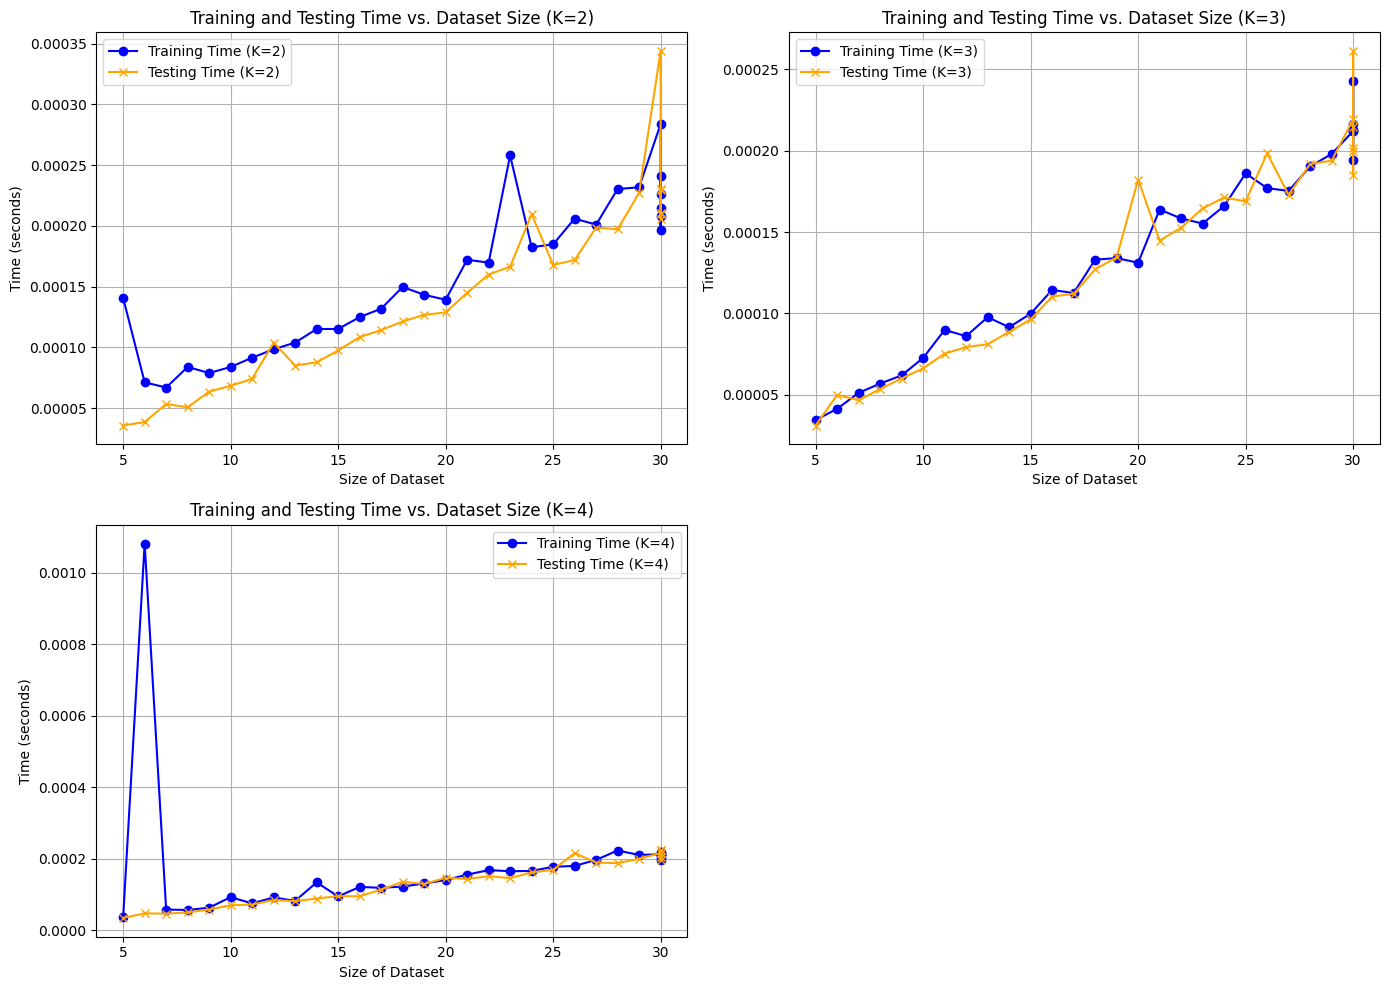

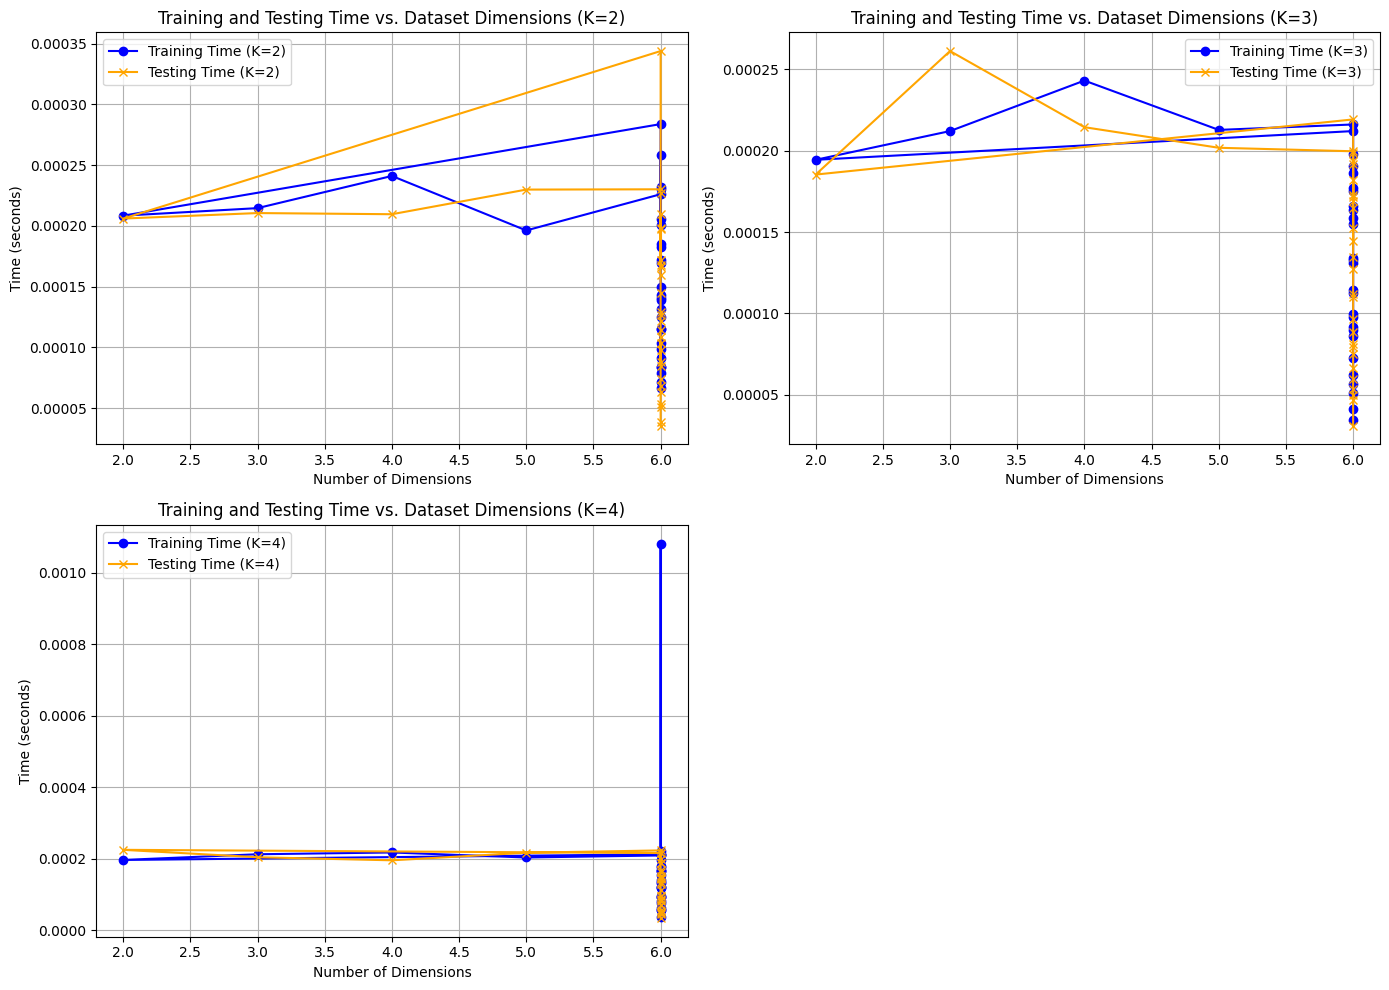

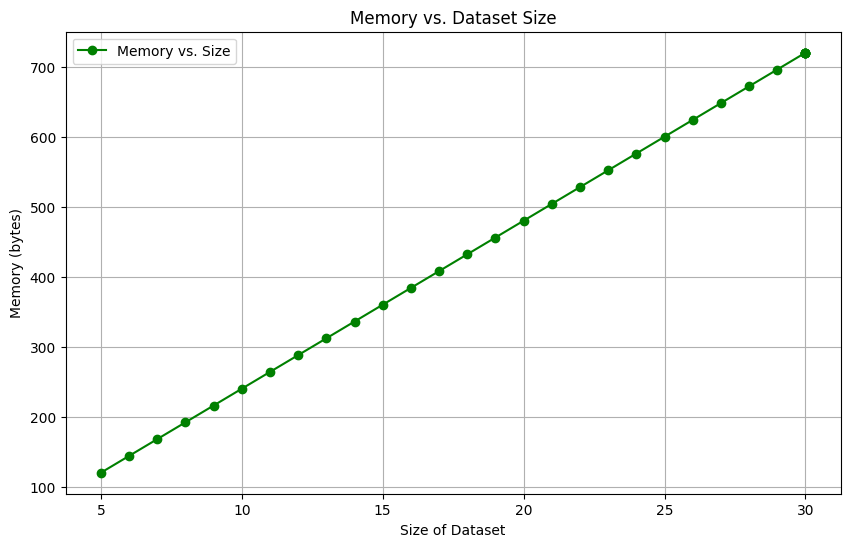

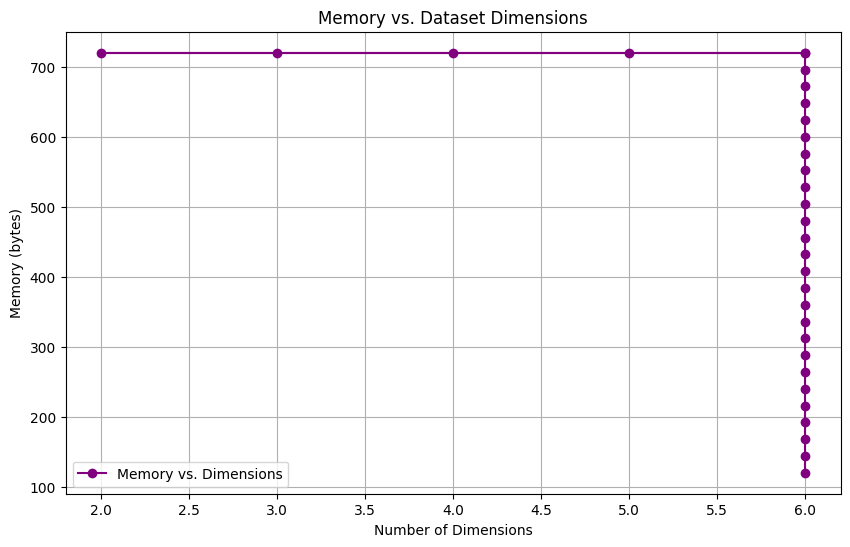

In [ ]:
def lsh_experiment(datasets, K_values, P_hyperplanes):
    training_times_size = {K: [] for K in K_values}
    testing_times_size = {K: [] for K in K_values}
    training_times_dim = {K: [] for K in K_values}
    testing_times_dim = {K: [] for K in K_values}
    memory_size = []
    memory_dim = []

    for dataset in datasets:
        n, d = dataset.shape
        print(f"Dataset shape: {dataset.shape}")

        for K in K_values:
            np.random.seed(35)
            R = np.random.randn(dataset.shape[1] + 1, P_hyperplanes)
            X_aug = np.hstack([np.ones((dataset.shape[0], 1)), dataset])
            X_proj = np.sign(X_aug @ R)

            start_time_train = time.time()
            distance_vector(X_proj, X_proj[0])  # Assuming query point is the first point in the dataset
            training_time = time.time() - start_time_train
            training_times_size[K].append(training_time)
            training_times_dim[K].append(training_time)

            start_time_test = time.time()
            distance_vector(X_proj, X_proj[0])
            testing_time = time.time() - start_time_test
            testing_times_size[K].append(testing_time)
            testing_times_dim[K].append(testing_time)

        memory_size.append(X_proj.nbytes)
        memory_dim.append(X_proj.nbytes)

    # Plotting
    plt.figure(figsize=(14, 10))

    for idx, K in enumerate(K_values, start=1):
        plt.subplot(2, 2, idx)
        plt.plot([len(data) for data in datasets], training_times_size[K], label=f'Training Time (K={K})', marker='o', color='blue')
        plt.plot([len(data) for data in datasets], testing_times_size[K], label=f'Testing Time (K={K})', marker='x', color='orange')
        plt.xlabel('Size of Dataset')
        plt.ylabel('Time (seconds)')
        plt.title(f'Training and Testing Time vs. Dataset Size (K={K})')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 10))

    for idx, K in enumerate(K_values, start=1):
        plt.subplot(2, 2, idx)
        plt.plot([data.shape[1] for data in datasets], training_times_dim[K], label=f'Training Time (K={K})', marker='o', color='blue')
        plt.plot([data.shape[1] for data in datasets], testing_times_dim[K], label=f'Testing Time (K={K})', marker='x', color='orange')
        plt.xlabel('Number of Dimensions')
        plt.ylabel('Time (seconds)')
        plt.title(f'Training and Testing Time vs. Dataset Dimensions (K={K})')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Memory vs. size and dimensions
    plt.figure(figsize=(10, 6))
    plt.plot([len(data) for data in datasets], memory_size, label='Memory vs. Size', marker='o', color='green')
    plt.xlabel('Size of Dataset')
    plt.ylabel('Memory (bytes)')
    plt.title('Memory vs. Dataset Size')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot([data.shape[1] for data in datasets], memory_dim, label='Memory vs. Dimensions', marker='o', color='purple')
    plt.xlabel('Number of Dimensions')
    plt.ylabel('Memory (bytes)')
    plt.title('Memory vs. Dataset Dimensions')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function with the datasets
datasets = array_of_datasets_size + array_of_datasets_dimensions
K_values = [2, 3, 4]
P_hyperplanes = 3
lsh_experiment(datasets, K_values, P_hyperplanes)

Explanation: For training in LSH, the time complexity is O(DNP), test is apprixmately O(Dlog(N)),, so test is better performing than train wrt size because test in log in N and train is linear(or NlogN, because P=logN) in N. Wrt to D, train and test are linear,, so not much difference.. For memory, in training, we have to store the hashes of all points, so its O(NP), so it increases linear wrt N and is constant wrt D

KD Trees

In [ ]:
from sklearn.neighbors import KDTree


Dataset shape: (5, 6)
Dataset shape: (6, 6)
Dataset shape: (7, 6)
Dataset shape: (8, 6)
Dataset shape: (9, 6)
Dataset shape: (10, 6)
Dataset shape: (11, 6)
Dataset shape: (12, 6)
Dataset shape: (13, 6)
Dataset shape: (14, 6)
Dataset shape: (15, 6)
Dataset shape: (16, 6)
Dataset shape: (17, 6)
Dataset shape: (18, 6)
Dataset shape: (19, 6)
Dataset shape: (20, 6)
Dataset shape: (21, 6)
Dataset shape: (22, 6)
Dataset shape: (23, 6)
Dataset shape: (24, 6)
Dataset shape: (25, 6)
Dataset shape: (26, 6)
Dataset shape: (27, 6)
Dataset shape: (28, 6)
Dataset shape: (29, 6)
Dataset shape: (30, 6)
Dataset shape: (30, 2)
Dataset shape: (30, 3)
Dataset shape: (30, 4)
Dataset shape: (30, 5)
Dataset shape: (30, 6)


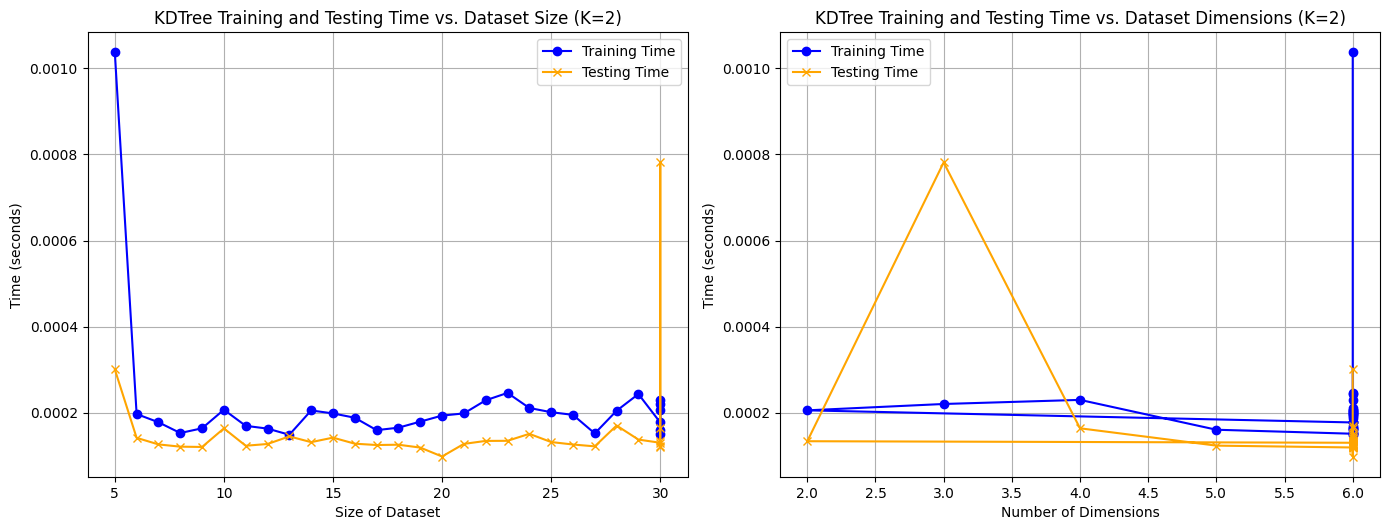

Dataset shape: (5, 6)
Dataset shape: (6, 6)
Dataset shape: (7, 6)
Dataset shape: (8, 6)
Dataset shape: (9, 6)
Dataset shape: (10, 6)
Dataset shape: (11, 6)
Dataset shape: (12, 6)
Dataset shape: (13, 6)
Dataset shape: (14, 6)
Dataset shape: (15, 6)
Dataset shape: (16, 6)
Dataset shape: (17, 6)
Dataset shape: (18, 6)
Dataset shape: (19, 6)
Dataset shape: (20, 6)
Dataset shape: (21, 6)
Dataset shape: (22, 6)
Dataset shape: (23, 6)
Dataset shape: (24, 6)
Dataset shape: (25, 6)
Dataset shape: (26, 6)
Dataset shape: (27, 6)
Dataset shape: (28, 6)
Dataset shape: (29, 6)
Dataset shape: (30, 6)
Dataset shape: (30, 2)
Dataset shape: (30, 3)
Dataset shape: (30, 4)
Dataset shape: (30, 5)
Dataset shape: (30, 6)


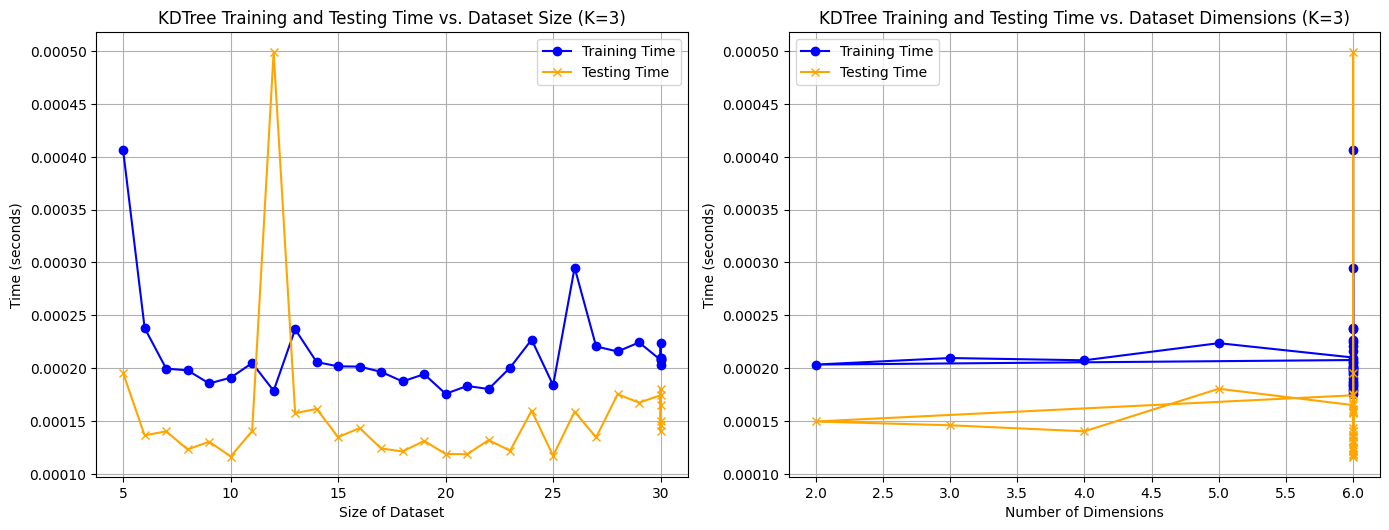

Dataset shape: (5, 6)
Dataset shape: (6, 6)
Dataset shape: (7, 6)
Dataset shape: (8, 6)
Dataset shape: (9, 6)
Dataset shape: (10, 6)
Dataset shape: (11, 6)
Dataset shape: (12, 6)
Dataset shape: (13, 6)
Dataset shape: (14, 6)
Dataset shape: (15, 6)
Dataset shape: (16, 6)
Dataset shape: (17, 6)
Dataset shape: (18, 6)
Dataset shape: (19, 6)
Dataset shape: (20, 6)
Dataset shape: (21, 6)
Dataset shape: (22, 6)
Dataset shape: (23, 6)
Dataset shape: (24, 6)
Dataset shape: (25, 6)
Dataset shape: (26, 6)
Dataset shape: (27, 6)
Dataset shape: (28, 6)
Dataset shape: (29, 6)
Dataset shape: (30, 6)
Dataset shape: (30, 2)
Dataset shape: (30, 3)
Dataset shape: (30, 4)
Dataset shape: (30, 5)
Dataset shape: (30, 6)


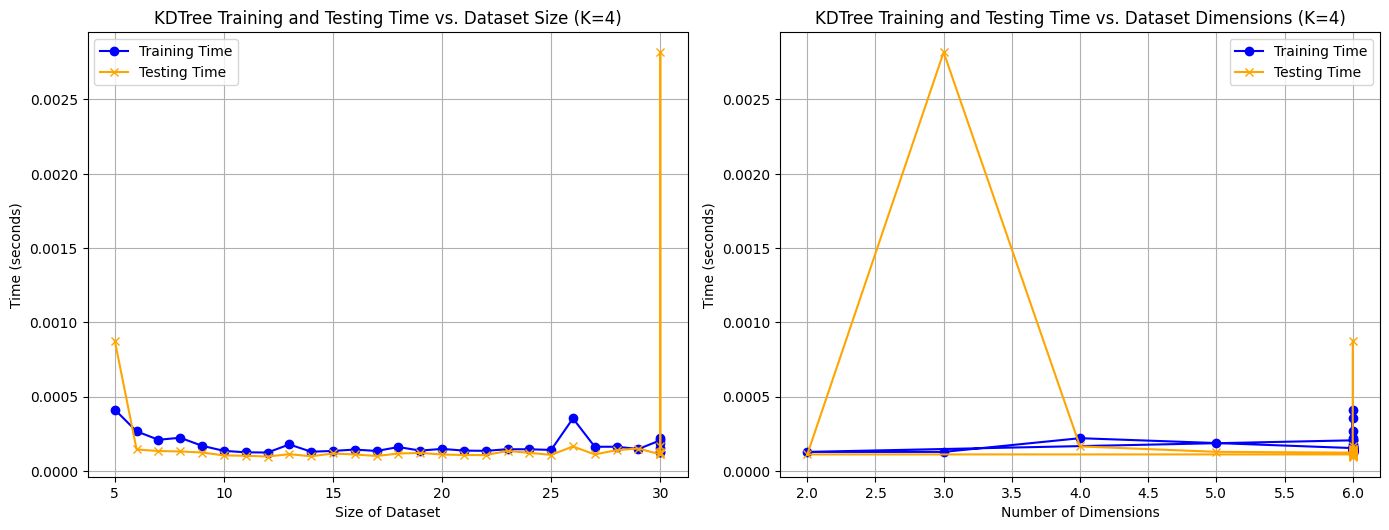

In [ ]:
def kdtree_experiment(datasets, K_values):
    for K in K_values:
        training_times_size = []
        testing_times_size = []
        training_times_dim = []
        testing_times_dim = []

        for dataset in datasets:
            n, d = dataset.shape
            print(f"Dataset shape: {dataset.shape}")

            # Training KDTree
            start_time_train = time.time()
            kdtree = KDTree(dataset)
            training_time = time.time() - start_time_train
            training_times_size.append(training_time)
            training_times_dim.append(training_time)

            # Testing KDTree
            start_time_test = time.time()
            kdtree.query(dataset[0].reshape(1, -1), k=5)
            testing_time = time.time() - start_time_test
            testing_times_size.append(testing_time)
            testing_times_dim.append(testing_time)

        # Plotting
        plt.figure(figsize=(14, 10))

        plt.subplot(2, 2, 1)
        plt.plot([len(data) for data in datasets], training_times_size, label='Training Time', marker='o', color='blue')
        plt.plot([len(data) for data in datasets], testing_times_size, label='Testing Time', marker='x', color='orange')
        plt.xlabel('Size of Dataset')
        plt.ylabel('Time (seconds)')
        plt.title(f'KDTree Training and Testing Time vs. Dataset Size (K={K})')
        plt.grid(True)
        plt.legend()

        plt.subplot(2, 2, 2)
        plt.plot([data.shape[1] for data in datasets], training_times_dim, label='Training Time', marker='o', color='blue')
        plt.plot([data.shape[1] for data in datasets], testing_times_dim, label='Testing Time', marker='x', color='orange')
        plt.xlabel('Number of Dimensions')
        plt.ylabel('Time (seconds)')
        plt.title(f'KDTree Training and Testing Time vs. Dataset Dimensions (K={K})')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Call the function with the datasets
datasets = array_of_datasets_size + array_of_datasets_dimensions
K_values = [2, 3, 4]
kdtree_experiment(datasets, K_values)


Here training time is O(Nlog^2N) and test is O(logN + DS) approx O(logN),, so test performs better than training in Size. For dimensions, when D is not <<N, then D will have influence of testing time, so testing time wrt D will soar above training

Naive Version

Dataset shape: (5, 6)
Dataset shape: (6, 6)
Dataset shape: (7, 6)
Dataset shape: (8, 6)
Dataset shape: (9, 6)
Dataset shape: (10, 6)
Dataset shape: (11, 6)
Dataset shape: (12, 6)
Dataset shape: (13, 6)
Dataset shape: (14, 6)
Dataset shape: (15, 6)
Dataset shape: (16, 6)
Dataset shape: (17, 6)
Dataset shape: (18, 6)
Dataset shape: (19, 6)
Dataset shape: (20, 6)
Dataset shape: (21, 6)
Dataset shape: (22, 6)
Dataset shape: (23, 6)
Dataset shape: (24, 6)
Dataset shape: (25, 6)
Dataset shape: (26, 6)
Dataset shape: (27, 6)
Dataset shape: (28, 6)
Dataset shape: (29, 6)
Dataset shape: (30, 6)
Dataset shape: (30, 2)
Dataset shape: (30, 3)
Dataset shape: (30, 4)
Dataset shape: (30, 5)
Dataset shape: (30, 6)


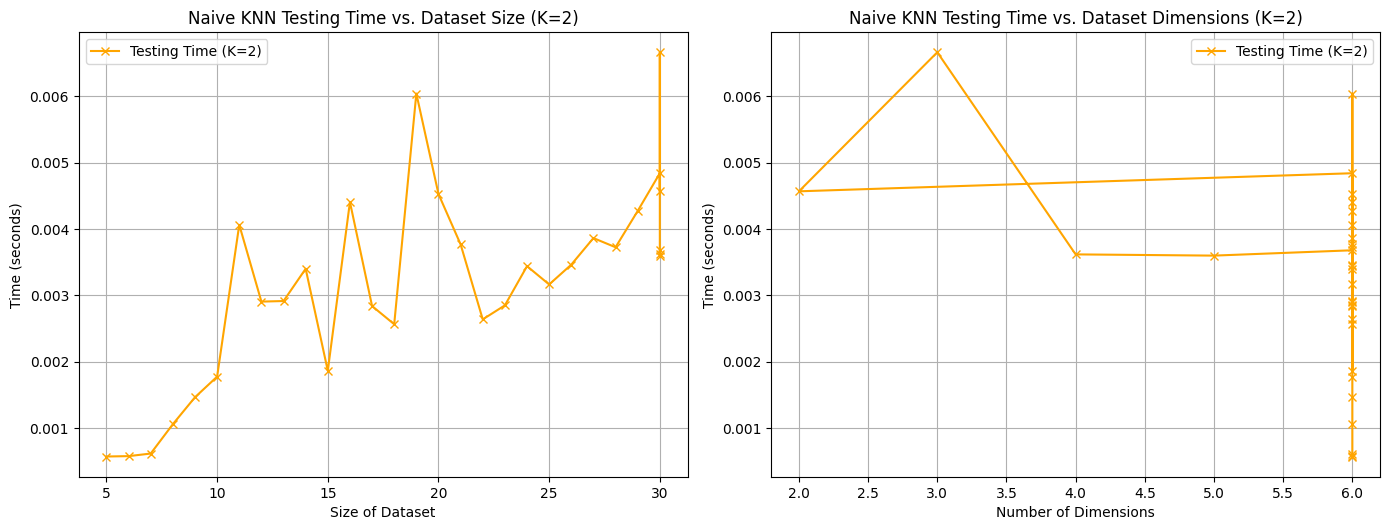

Dataset shape: (5, 6)
Dataset shape: (6, 6)
Dataset shape: (7, 6)
Dataset shape: (8, 6)
Dataset shape: (9, 6)
Dataset shape: (10, 6)
Dataset shape: (11, 6)
Dataset shape: (12, 6)
Dataset shape: (13, 6)
Dataset shape: (14, 6)
Dataset shape: (15, 6)
Dataset shape: (16, 6)
Dataset shape: (17, 6)
Dataset shape: (18, 6)
Dataset shape: (19, 6)
Dataset shape: (20, 6)
Dataset shape: (21, 6)
Dataset shape: (22, 6)
Dataset shape: (23, 6)
Dataset shape: (24, 6)
Dataset shape: (25, 6)
Dataset shape: (26, 6)
Dataset shape: (27, 6)
Dataset shape: (28, 6)
Dataset shape: (29, 6)
Dataset shape: (30, 6)
Dataset shape: (30, 2)
Dataset shape: (30, 3)
Dataset shape: (30, 4)
Dataset shape: (30, 5)
Dataset shape: (30, 6)


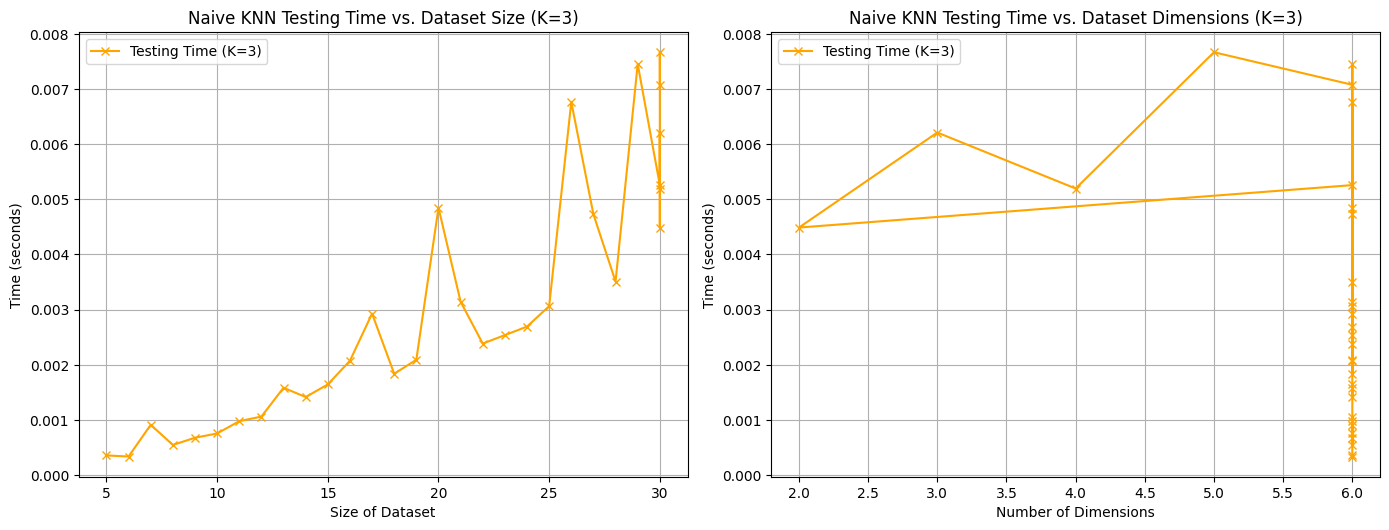

Dataset shape: (5, 6)
Dataset shape: (6, 6)
Dataset shape: (7, 6)
Dataset shape: (8, 6)
Dataset shape: (9, 6)
Dataset shape: (10, 6)
Dataset shape: (11, 6)
Dataset shape: (12, 6)
Dataset shape: (13, 6)
Dataset shape: (14, 6)
Dataset shape: (15, 6)
Dataset shape: (16, 6)
Dataset shape: (17, 6)
Dataset shape: (18, 6)
Dataset shape: (19, 6)
Dataset shape: (20, 6)
Dataset shape: (21, 6)
Dataset shape: (22, 6)
Dataset shape: (23, 6)
Dataset shape: (24, 6)
Dataset shape: (25, 6)
Dataset shape: (26, 6)
Dataset shape: (27, 6)
Dataset shape: (28, 6)
Dataset shape: (29, 6)
Dataset shape: (30, 6)
Dataset shape: (30, 2)
Dataset shape: (30, 3)
Dataset shape: (30, 4)
Dataset shape: (30, 5)
Dataset shape: (30, 6)


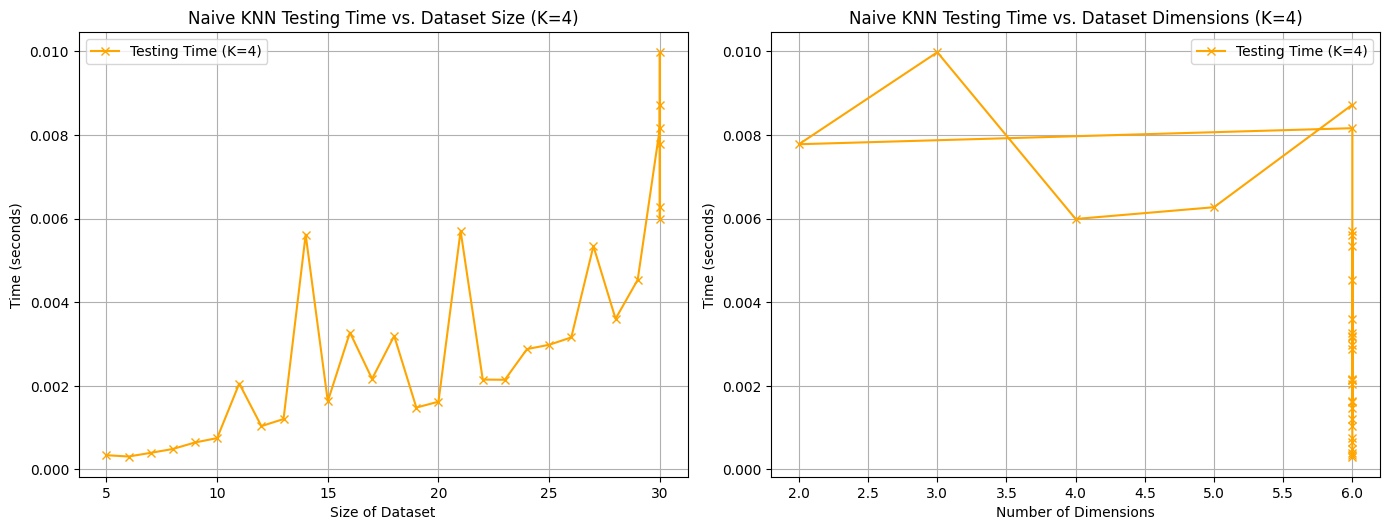

In [ ]:
def naive_knn_experiment(datasets, K_values):
    for K in K_values:
        training_times_size = []
        testing_times_size = []
        training_times_dim = []
        testing_times_dim = []

        for dataset in datasets:
            n, d = dataset.shape
            print(f"Dataset shape: {dataset.shape}")

            # Training Naive KNN (No training needed)

            # Testing Naive KNN
            start_time_test = time.time()
            for query_pt in dataset:
                distances = distance_vector(dataset, query_pt)
                nearest_indices = np.argsort(distances)[:K]
            testing_time = time.time() - start_time_test

            testing_times_size.append(testing_time)
            testing_times_dim.append(testing_time)

        # Plotting
        plt.figure(figsize=(14, 10))

        plt.subplot(2, 2, 1)
        plt.plot([len(data) for data in datasets], testing_times_size, label=f'Testing Time (K={K})', marker='x', color='orange')
        plt.xlabel('Size of Dataset')
        plt.ylabel('Time (seconds)')
        plt.title(f'Naive KNN Testing Time vs. Dataset Size (K={K})')
        plt.grid(True)
        plt.legend()

        plt.subplot(2, 2, 2)
        plt.plot([data.shape[1] for data in datasets], testing_times_dim, label=f'Testing Time (K={K})', marker='x', color='orange')
        plt.xlabel('Number of Dimensions')
        plt.ylabel('Time (seconds)')
        plt.title(f'Naive KNN Testing Time vs. Dataset Dimensions (K={K})')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Call the function with the datasets
datasets = array_of_datasets_size + array_of_datasets_dimensions
K_values = [2, 3, 4]
naive_knn_experiment(datasets, K_values)

Here as expected, testing time will increase with both size and dimensions

For KD Trees

Average Training Time vs Size: 0.00014292040178852698 <br>
Average Testing Time vs Size: 0.00012709632996589908 <br>
Average Training Time vs Dimensions: 0.00014292040178852698<br>
Average Testing Time vs Dimensions: 0.00012709632996589908<br>

For Training Time Vs size: Naive KNN<LSH<KD_Trees(because for KD_Trees, its Nlog^2 N, while in LSH it's just N) <br> Training Vs dimensions: Naive KNN<KD_Trees<LSH(because LSH has a paramter in D) <br> Test Vs Size: LSH approx: KD_ trees< Naive KNN <br> Test VS Dimensions: KD_TREES<LSH< Naive KNN( all three are linear in D, but it looses when D<<N in case of K_D Trees)

For the 2-D dataset

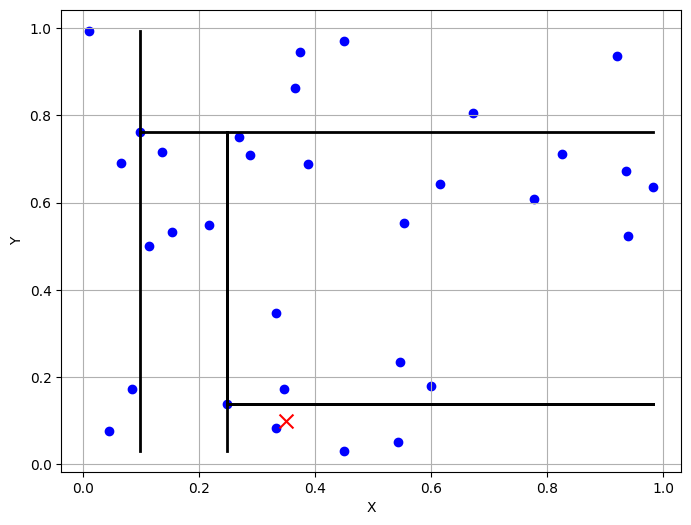

In [ ]:
np.random.seed(19)
data = np.random.rand(30, 2)

# Generate random query point
query_point = np.array([[0.35,0.1]])

# Build KD-tree
kdtree = KDTree(data, leaf_size=30)

# Query KD-tree for 5 nearest neighbors
distances_kdtree, indices_kdtree = kdtree.query(query_point, k=5)

# Plot dataset, query point, and partitions
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='b')  # Plot dataset
plt.scatter(query_point[:, 0], query_point[:, 1], c='r', marker='x', s=100)  # Highlight query point

# Define a function to plot partitions recursively
def plot_partition(node_indices, x_bounds, y_bounds, depth=0):
    if len(node_indices) == 0:
        return
    if len(node_indices) <= 8 or depth >= 10:  # Terminate recursion if less than 8 points or max depth reached
        return
    split_dim = depth % 2
    split_value = data[node_indices[0], split_dim]
    if split_dim == 0:
        plt.plot([split_value, split_value], [y_bounds[0], y_bounds[1]], 'k-', linewidth=2)
        left_indices = node_indices[data[node_indices, split_dim] < split_value]
        right_indices = node_indices[data[node_indices, split_dim] >= split_value]
        plot_partition(left_indices, [x_bounds[0], split_value], y_bounds, depth + 1)
        plot_partition(right_indices, [split_value, x_bounds[1]], y_bounds, depth + 1)
    else:
        plt.plot([x_bounds[0], x_bounds[1]], [split_value, split_value], 'k-', linewidth=2)
        lower_indices = node_indices[data[node_indices, split_dim] < split_value]
        upper_indices = node_indices[data[node_indices, split_dim] >= split_value]
        plot_partition(lower_indices, x_bounds, [y_bounds[0], split_value], depth + 1)
        plot_partition(upper_indices, x_bounds, [split_value, y_bounds[1]], depth + 1)

# Start plotting partitions
root_node = np.arange(len(data))
x_bounds = [data[:, 0].min(), data[:, 0].max()]
y_bounds = [data[:, 1].min(), data[:, 1].max()]
plot_partition(root_node, x_bounds, y_bounds)

# Highlight nearest neighbors found by KD-tree
nearest_neighbors_kdtree = data[indices_kdtree]
plt.scatter(nearest_neighbors_kdtree[:, 0], nearest_neighbors_kdtree[:, 1], c='b')

plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True)
plt.show()

# Compare with naive KNN approach
knn = NearestNeighbors(n_neighbors=5)
knn.fit(data)
distances_naive, indices_naive = knn.kneighbors(query_point)




Clearly the point right above the query point shown in the plot will be missed for K>=2 nearest neighbour search in KDTrees because it is outside the partition.